# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [6]:
# student 1:Avraham Maro 2154
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [7]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [8]:
#טעינת הטראין סט והטסט סט
train = pd.read_csv(r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_train.csv')
test = pd.read_csv(r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_test.csv')

#הדפסת 5 השורות הראשונות
print(train.head())
print(test.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.009836       848.0  2.780328    

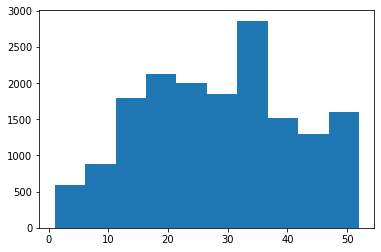

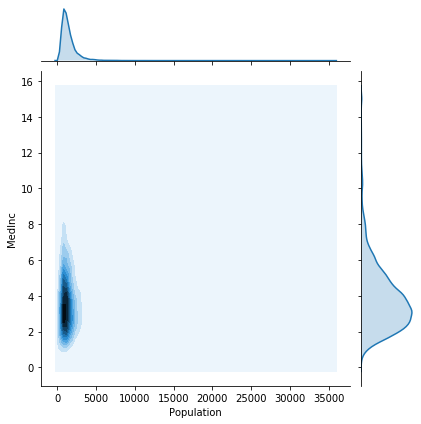

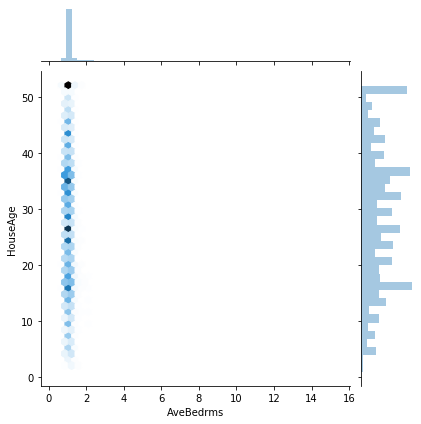

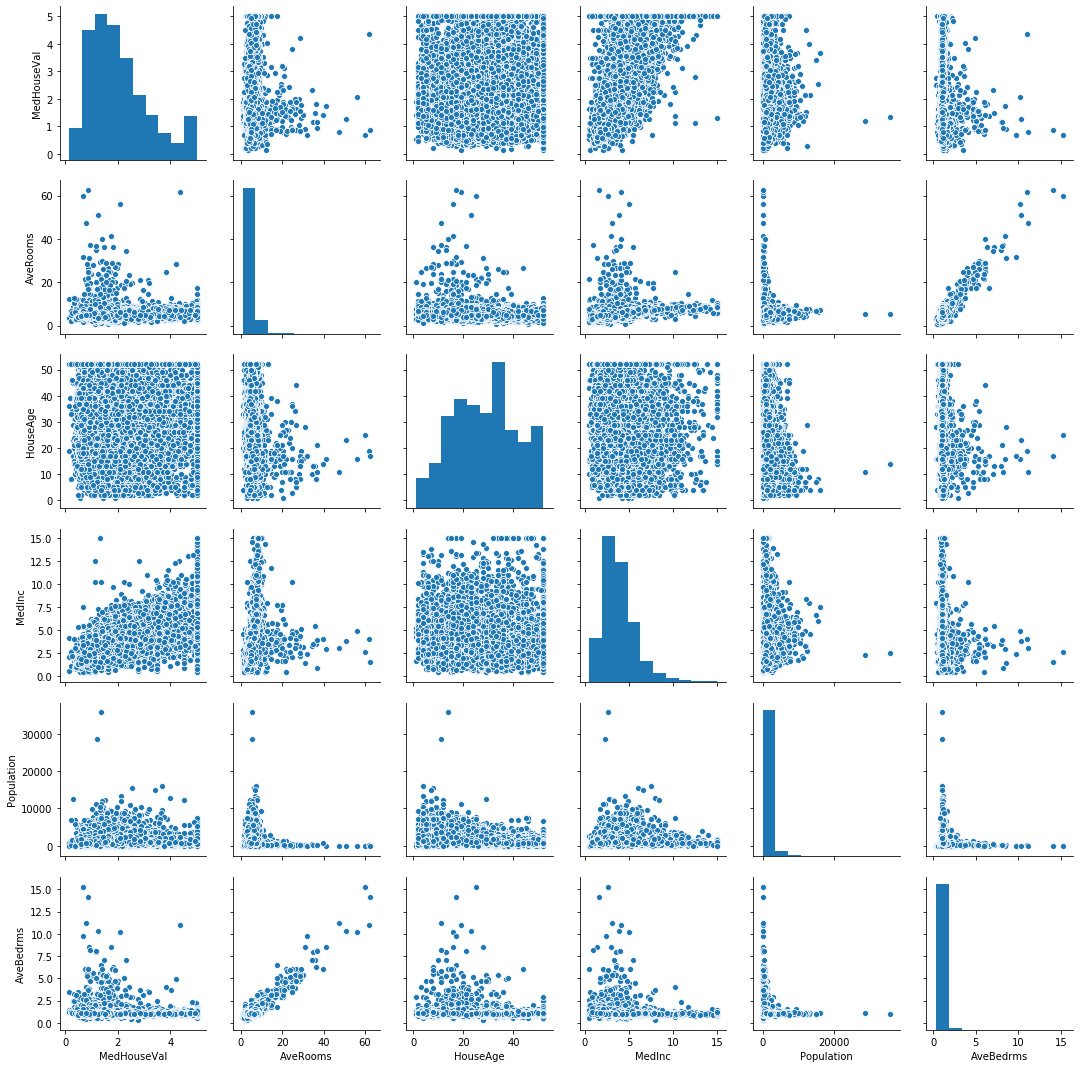

In [9]:
train = pd.read_csv(r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_train.csv')
test = pd.read_csv(r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_test.csv')

# 1. הצגת סטטיסטיקות כלליות
#print(train.describe())

# יצירת DataFrame לדוגמה
#sns.paintplot(train['AveBedrms'], train['HouseAge'], train['MedInc'])
#df = pd.DataFrame(data)

# יצירת תרשים פיזור
#sns.scatterplot(x='x', y='y', data=train)
plt.show()

plt.hist(train['HouseAge'])
#print()
sns.jointplot(train['Population'], train['MedInc'], kind="kde")

sns.jointplot(train['AveBedrms'], train['HouseAge'], kind="hex")

sns.pairplot(train[['MedHouseVal','AveRooms','HouseAge','MedInc','Population','AveBedrms']])

## Part 3 - Experiments
You could add as many code cells as needed

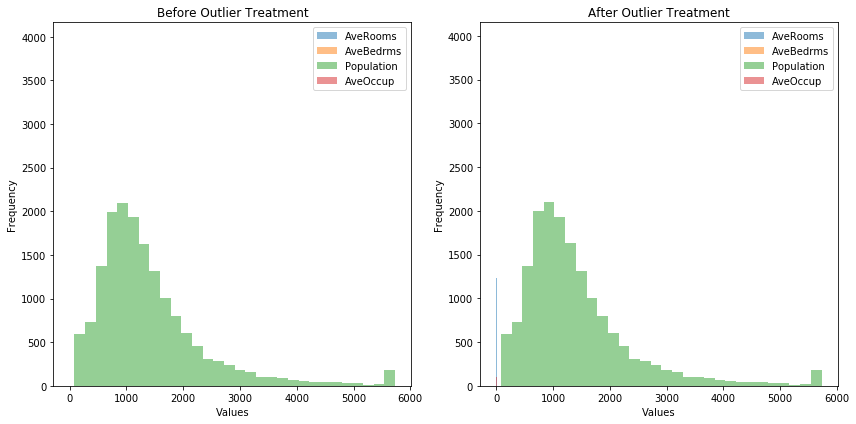

In [26]:
# שלב 1: טיפול בערכים קיצוניים
def treat_outliers(train):

    # גרף לפני טיפול
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for col in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
        plt.hist(train[col], bins=30, alpha=0.5, label=col)
    plt.title('Before Outlier Treatment')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    # טיפול בערכים קיצוניים
    for col in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
        lower_limit = train[col].quantile(0.01)
        upper_limit = train[col].quantile(0.99)
        train[col] = np.clip(train[col], lower_limit, upper_limit)

    # גרף אחרי טיפול
    plt.subplot(1, 2, 2)
    for col in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
        plt.hist(train[col], bins=30, alpha=0.5, label=col)
    plt.title('After Outlier Treatment')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return train

# טיפול בערכים קיצוניים על ה-DataFrame הקיים
train = treat_outliers(train)

In [11]:
# דוגמה לפיצ'ר אנג'ינירינג
def feature_engineering(X):
    # יצירת תכונות חדשות
    X['Rooms_Per_Bedroom'] = X['AveRooms'] / (X['AveBedrms'] + 1e-6)  # יחס חדרים לחדרי שינה
    X['Occupancy_Ratio'] = X['Population'] / (X['AveOccup'] + 1e-6)  # יחס אוכלוסייה לאוכלוסיית ממוצע
    return X
# חילוק ה-featureים והמטרה (target)
X_train = train.drop('MedHouseVal', axis=1)
y_train = train['MedHouseVal']
X_test = test.drop('MedHouseVal', axis=1)
y_test = test['MedHouseVal']

# החלת פיצ'ר אנג'ינירינג על הסטים
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)



# הגדרת תכונות כמותיות ונומינליות במידת הצורך
categorical_features = []  # Replace with your categorical features
numerical_features = X_train.columns  # כל התכונות הן כמותיות במידה ואין נומינליות

# הגדרת פרה-פרוססור (Preprocessor)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        # אם יש תכונות נומינליות, אפשר להוסיף כאן OneHotEncoder:
        # ('cat', OneHotEncoder(), categorical_features)
    ])

# רשימה לשמירת תוצאות עבור כל מודל
summary_results = []

# מודלים להערכה
models_params = [
    ('Random Forest', RandomForestRegressor(random_state=42), {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }),
    ('Linear Regression', LinearRegression(), {
        'model__fit_intercept': [True, False],
        'model__normalize': [True, False]
    }),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5, 7]
    })
]

for model_name, model, param_grid in models_params:
    # יצירת pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # הגדרת grid search עם 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

    # התאמת המודל על סט האימון
    grid_search.fit(X_train, y_train)

    # קבלת התוצאות הטובות ביותר
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # הערכה על סט הבדיקה
    test_score = best_model.score(X_test, y_test)

    # הוספת תוצאות לסיכום
    summary_results.append({
        'Model': model_name,
        'Best CV R^2': best_score,
        'Test R^2': test_score,
        'Best Parameters': best_params
    })

# המודל המוצלח ביותר
best_overall_model = max(summary_results, key=lambda x: x['Test R^2'])

# המרת התוצאות למסגרת נתונים
summary_df = pd.DataFrame(summary_results)

# הדפסת הטבלה
print("\nModels Summary:")
print(summary_df)

print("\nBest Model:")
print(f"מודל: {best_overall_model['Model']}")
print(f"Best hyper parameters: {best_overall_model['Best Parameters']}")
print(f"R^2 on test: {best_overall_model['Test R^2']:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.9min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.6min finished



סיכום תוצאות המודלים:
   Best CV R^2                                    Best Parameters  \
0     0.797314  {'model__max_depth': None, 'model__min_samples...   
1     0.660874  {'model__fit_intercept': True, 'model__normali...   
2     0.832085  {'model__learning_rate': 0.1, 'model__max_dept...   

               Model  Test R^2  
0      Random Forest  0.824590  
1  Linear Regression  0.513868  
2  Gradient Boosting  0.852812  

המודל המוצלח ביותר:
מודל: Gradient Boosting
פרמטרים מיטביים: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}
R^2 על סט הבדיקה: 0.8528


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
# הכנת הנתונים
X_full = feature_engineering(train.drop('MedHouseVal', axis=1))  # החלת פיצ'ר אנג'ינירינג על כל ה-train
y_full = train['MedHouseVal']

# חיפוש המודל המקורי מתוך models_params
best_model_name = best_overall_model['Model']
best_params = best_overall_model['Best Parameters']

# מציאת המודל הטוב ביותר מתוך models_params
final_model = next((model for name, model, params in models_params if name == best_model_name), None)

if final_model is not None:
    # התאמת הפרמטרים ללא המילה 'model__'
    final_model.set_params(**{key.replace('model__', ''): value for key, value in best_params.items()})

    # אימון המודל על כל הנתונים ב-train
    final_model.fit(X_full, y_full)

## Part 5 - Apply on test and show model performance estimation

In [28]:
# Evaluate the model on the test set
test_score_final = final_model.score(X_test_final, y_test)

# Print results
print("\nTraining the best model on the entire train set:")
print(f"Model: {best_model_name}")
print(f"R^2 on the test set after training: {test_score_final:.4f}")

# Display the first 5 predictions compared to the true values
results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
print("\nPredictions vs True Values:")
print(results_df.head())


Training the best model on the entire train set:
Model: Gradient Boosting
R^2 on the test set after training: 0.8521

Predictions vs True Values:
   True Values  Predicted Values
0        3.852          3.310827
1        2.457          2.463137
2        2.013          2.600708
3        1.052          1.195145
4        1.078          1.018806
